In [90]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


df = pd.read_csv('../data/RFID_DATA_SET.csv')
df.fillna(0)

# print(df.head(5))

data = df
# X = data.drop('RSSI', axis=1)
# X = X.iloc[0::].values
X = data['DISTANCE'].to_frame()
y = data['RSSI'].values
# print(X[0])
# print(y[0])

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_train)
poly.fit(X_train, y_train)

lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)

LinearRegression()

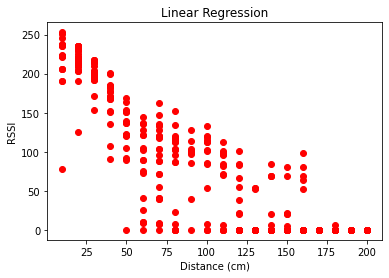

In [92]:
plt.scatter(X_test, y_test, color='red')
# plt.plot(X_test, y_test, color='red')
plt.title('Linear Regression')
plt.xlabel('Distance (cm)')
plt.ylabel('RSSI')
plt.show()

0.8308334119796371


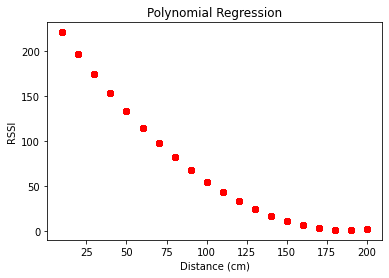

In [93]:
y_pred = lin_reg.predict(poly.fit_transform(X_test))
r2 = r2_score(y_test, y_pred)
print(r2)

# Visualising the Polynomial Regression results
plt.scatter(X_test, y_pred, color = 'red')
# plt.plot(X_test, y_pred, color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Distance (cm)')
plt.ylabel('RSSI')

plt.show()

In [94]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X, y, cv=10, scoring='r2')
print(scores)

[0.69615203 0.69010809 0.70708775 0.66388529 0.7190813  0.74740022
 0.69594861 0.72759384 0.66252747 0.67272154]


In [95]:
print("Means Absolute Error")
print(metrics.mean_absolute_error(y_test, y_pred))
print("Means Square Error")
print(metrics.mean_squared_error(y_test, y_pred))
print("All R2 Scores")
print(scores)
print("Mean R2 Score")
print(scores.mean())

Means Absolute Error
24.358937350852344
Means Square Error
1190.1507637612924
All R2 Scores
[0.69615203 0.69010809 0.70708775 0.66388529 0.7190813  0.74740022
 0.69594861 0.72759384 0.66252747 0.67272154]
Mean R2 Score
0.6982506129408964
